In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [27]:
import matplotlib.pyplot as plt

In [2]:
dataset  = pd.read_csv('/content/drive/MyDrive/DL_Project/Churn_prediction/Churn_Modelling.csv')

####Dividing dataset into independent and dependent variable

In [3]:
X= dataset.iloc[:,3:-1].values

In [4]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [5]:
Y= dataset.iloc[:,-1].values

In [6]:
print(Y)

[1 0 1 ... 1 1 0]


####Label Encodeing Gender  

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,2]=le.fit_transform(X[:,2])

In [8]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


####converting country data using one hot encodeing


In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [10]:
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])], remainder='passthrough')
X=np.array(ct.fit_transform(X))

In [11]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [12]:
X[0]

array([1.0, 0.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
      dtype=object)

####Dividing dataset into train and test data

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y, test_size=0.2, random_state=0)

####Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.fit_transform(X_test)

#### Building ANN Model

In [15]:
ann = tf.keras.models.Sequential()

In [16]:
#### adding input and first hidden layer
# units = number of neurons
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

In [17]:
#### adding second hidden layer
ann.add(tf.keras.layers.Dense(6,'relu'))

In [18]:
#adding output layer
ann.add(tf.keras.layers.Dense(1,'sigmoid'))

####Training Model


In [19]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

####Training model with data

In [20]:
history = ann.fit(X_train,Y_train,batch_size=32,epochs=100)

Epoch 1/100
250/250 [==============================] - 13s 6ms/step - loss: 0.5525 - accuracy: 0.7959
Epoch 2/100
250/250 [==============================] - 1s 6ms/step - loss: 0.4719 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 1s 5ms/step - loss: 0.4484 - accuracy: 0.7960
Epoch 4/100
250/250 [==============================] - 1s 5ms/step - loss: 0.4362 - accuracy: 0.7960
Epoch 5/100
250/250 [==============================] - 1s 6ms/step - loss: 0.4280 - accuracy: 0.7960
Epoch 6/100
250/250 [==============================] - 2s 9ms/step - loss: 0.4207 - accuracy: 0.7960
Epoch 7/100
250/250 [==============================] - 3s 10ms/step - loss: 0.4136 - accuracy: 0.7960
Epoch 8/100
250/250 [==============================] - 2s 6ms/step - loss: 0.4070 - accuracy: 0.7960
Epoch 9/100
250/250 [==============================] - 2s 6ms/step - loss: 0.4008 - accuracy: 0.7960
Epoch 10/100
250/250 [==============================] - 1s 5ms/step - loss: 0.3958 - accu

In [21]:
y_pred=ann.predict(X_test)

63/63 [==============================] - 0s 2ms/step


In [22]:
y_pred=y_pred.argmax(axis=1)

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
score = accuracy_score(Y_test,y_pred )

In [25]:
score

0.7975

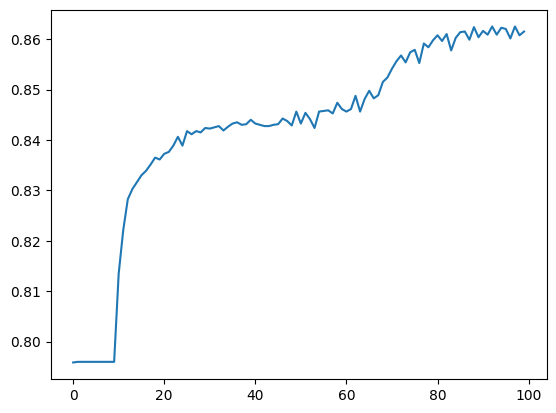

In [28]:
plt.plot(history.history['accuracy'])

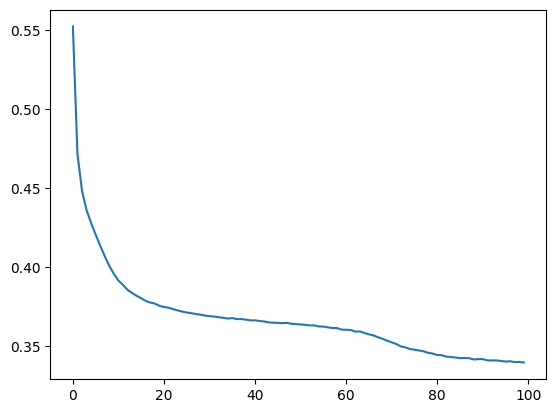

In [29]:
plt.plot(history.history['loss'])